# Convolutional Neural Network

CNN (Convolutional Neural Network) is a type of neural network commonly used for image recognition and processing tasks. The basic building blocks of a CNN are convolutional layers, which consist of a set of learnable filters that are applied to the input image to extract features. These filters slide over the input image and perform element-wise multiplication and summation operations to produce a feature map.

The output of the convolutional layers is typically passed through one or more pooling layers, which downsample the feature maps to reduce their spatial dimensionality and make the network more computationally efficient. Finally, the output of the pooling layers is passed through one or more fully connected layers, which perform a classification or regression task.

CNNs are particularly effective for image classification tasks because they can automatically learn spatial hierarchies of features from the raw image data, without the need for hand-engineered feature extraction. This makes them well-suited for a wide range of computer vision applications, including object detection, segmentation, and recognition.

# Import Library Function

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join 

from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

 ResNet50 model pre-trained on the ImageNet dataset.

ResNet50 is a deep convolutional neural network architecture with 50 layers, which has achieved state-of-the-art performance on many computer vision tasks, such as object recognition and detection. The ImageNet dataset contains millions of labeled images, and training a model on this dataset can result in a highly accurate model for many image-related tasks.

The weights='imagenet' argument specifies that the pre-trained weights should be loaded from the ImageNet dataset. By using these pre-trained weights, the model is already trained to recognize many different types of objects, making it useful for a wide range of applications.

In [3]:
resnetModel = ResNet50(weights='imagenet')  

102967424/102967424 [==============================] - 1s 0us/step


In [4]:
imagePath = "../input/dogpic/Dog.jpg"

* **image.load_img(imagePath, target_size=(224, 224))** loads an image from the specified file path and resizes it to a target size of 224x224 pixels using the Python Imaging Library (PIL).

* **image.img_to_array(img)** converts the PIL image object to a NumPy array, which can be processed by the model.

* **np.expand_dims(x, axis=0)** adds an extra dimension to the array at position 0. This is done to create a batch of images, as most deep learning models take inputs in batches. The resulting array now has a shape of (1, 224, 224, 3), where the first dimension is the batch size, the second and third dimensions are the image dimensions, and the fourth dimension represents the color channels (RGB).

* **preprocess_input(x)** performs pre-processing on the input image array. In the case of ResNet50, this function applies a set of preprocessing operations, such as normalization and color channel reordering, that are specific to this model architecture. This helps to ensure that the input data is in a suitable format for the model to process and produce accurate results.

In [5]:
img = image.load_img(imagePath, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

In [6]:
x

array([[[[-95.939   , -57.779   , -68.68    ],
         [-94.939   , -56.779   , -67.68    ],
         [-93.939   , -55.779   , -66.68    ],
         ...,
         [-25.939003,  32.221   ,  15.32    ],
         [-25.939003,  31.221   ,  17.32    ],
         [-26.939003,  30.221   ,  16.32    ]],

        [[-96.939   , -58.779   , -69.68    ],
         [-96.939   , -58.779   , -69.68    ],
         [-95.939   , -57.779   , -68.68    ],
         ...,
         [-26.939003,  31.221   ,  14.32    ],
         [-26.939003,  30.221   ,  16.32    ],
         [-27.939003,  29.221   ,  15.32    ]],

        [[-97.939   , -59.779   , -73.68    ],
         [-97.939   , -59.779   , -73.68    ],
         [-96.939   , -58.779   , -72.68    ],
         ...,
         [-24.939003,  33.221   ,  16.32    ],
         [-25.939003,  31.221   ,  17.32    ],
         [-26.939003,  30.221   ,  16.32    ]],

        ...,

        [[-87.939   , -54.779   , -67.68    ],
         [-90.939   , -57.779   , -70.68    ]

In [7]:
modelPredictions = resnetModel.predict(x)

1/1 [==============================] - 6s 6s/step


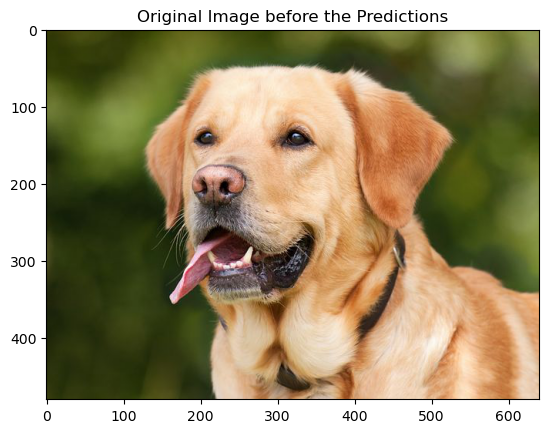

35363/35363 [==============================] - 0s 0us/step
Predictions Result is : [('n02099712', 'Labrador_retriever', 0.5566102), ('n02099601', 'golden_retriever', 0.41891712), ('n02087394', 'Rhodesian_ridgeback', 0.007265307)]


In [8]:
imageRead = plt.imread("../input/dogpic/Dog.jpg")
plt.imshow(imageRead)
plt.title("Original Image before the Predictions")
plt.show()

# print("Predictions Result is : {}".format(decode_predictions(modelPredictions, top = 3)[0]))
# _, classnames, accuracy  = decode_predictions(modelPredictions, top = 3)[0][0]
# print("Predicted Class : {}\nAccuracy: {}%".format(classnames,round( accuracy, 2)*100))

_, classnames, accuracy  = decode_predictions(modelPredictions, top = 3)[0][0]
r= classnames.split("_")
classNamesFirst, classNamesSecond = r[0].title(), r[1].title()
print("Predictions Result is : {}".format(decode_predictions(modelPredictions, top = 3)[0]))

In [9]:
# a, b, c = [(3, 4, 5)]

# Prediction
 1. ancode_predictions
 2. decode_predictions

In [10]:
decode_predictions(modelPredictions, top = 3)        # top=3 --> return the top three predictions.

[[('n02099712', 'Labrador_retriever', 0.5566102),
  ('n02099601', 'golden_retriever', 0.41891712),
  ('n02087394', 'Rhodesian_ridgeback', 0.007265307)]]

In [11]:
_, classnames, accuracy  = decode_predictions(modelPredictions, top = 3)[0][0]
print("Predicted Class : {}\nAccuracy: {}%".format(classnames,round( accuracy, 2)*100))

Predicted Class : Labrador_retriever
Accuracy: 56.00000023841858%


In [12]:
_, classnames, accuracy  = decode_predictions(modelPredictions, top = 3)[0][0]
r= classnames.split("_")
classNamesFirst, classNamesSecond = r[0].title(), r[1].title()
print("Predicted Class : {}\nAccuracy: {}%".format(classNamesFirst, classNamesSecond, accuracy))

Predicted Class : Labrador
Accuracy: Retriever%


In [13]:
r= classnames.split("_")

In [14]:
classNamesFirst, classNamesSecond = r[0].title(), r[1].title()

# # Design

In [15]:
# model = Sequential()

# # Input Layer 01
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2, 2)))


# # Hidden Layer 01
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2, 2)))


# # Hidden Layer 02
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2, 2)))


# # Hidden Layer 03
# model.add(Conv2D(128 ))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # Flatten Layer 
# model.add(Flatten())

# # Fully Connected Neural Network
# model.add(Dense(128))
# model.add(Densen(number_of_classes))

The cv2.**copyMakeBorder** function is used to create a new image with a border around the input image. It takes several arguments:

**input_image:** the input image that will have a border added to it

**0:** the number of pixels to add to the top of the image 
    
**0:** the number of pixels to add to the bottom of the image 
    
**0:** the number of pixels to add to the left of the image 


**imageL.shape[1]+300:** the number of pixels to add to the right of the image. imageL is a variable that is not defined in the code snippet you provided, so it's not clear what its shape is. The +300 is used to add an additional 300 pixels to the border.

**cv2.BORDER_CONSTANT:** the type of border to add. In this case, a constant value is used to fill the border pixels.

**value = backgroundColor:** the color of the border pixels. backgroundColor is a list of three values representing the blue, green, and red color channels.

The resulting expandImage is the original input image with a border added to the right side. The border has a width of imageL.shape[1]+300 pixels and is filled with the backgroundColor.

# PutText Function



**expandImage** is the image to which the text will be added.

**str(names)** is the text to be added. names is likely a variable containing a list of names, and str() is being used to convert that list into a string.

**(image_width + 50, 50)** is the coordinates where the text will be added. 

**(image_width + 50, 50)** likely means that the text will be added to the right of the original image, 50 pixels to the right of the rightmost edge, and 50 pixels down from the top edge.

**cv2.FONT_HERSHEY_COMPLEX_SMALL** is the font used to render the text. This is a built-in font provided by OpenCV.

**2** is the font scale. This determines the size of the text.

**(255, 255, 255)** is the color of the text. In this case, it is white, which is represented by the RGB color (255, 255, 255).

**1** is the thickness of the text. This determines how thick the lines of the text will be.

In [ ]:


def drawTextonImage(names, predictions, input_image):
    backgroundColor = [0, 0, 0]
    expandImage = cv2.copyMakeBorder(input_image, 0, 0, 0, imageL.shape[1]+300, cv2.BORDER_CONSTANT, value = backgroundColor)
    image_width = input_image.shape[1]
    
    for (i, predictions) in enumerate(predictions):
        imageStrings = str(predictions[1])  + " " + str(predictions[2])
        
        cv2.putText(expandImage, str(names), (image_width + 50, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (255, 255, 255), 1)
        cv2.putText(expandImage, imageStrings, (image_width + 50, 50+((i+1)*50)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1)
        plt.imshow(expandImage)
    
imagePath = "../input/cat-and-dogs/dataset/test_set/dogs/"
imageFileName = [f for f in listdir(imagePath) if isfile(join(imagePath, f))]

# Image Resize

**cv2.resize():** This is a function from the OpenCV library that is used to resize images.

**imageNew:** This is the image that is being resized.

**None:** This parameter specifies the output image size. In this case, None means that the output size will be determined automatically based on the scaling factors.

**fx = 0.5, fy = 0.5:** These are the scaling factors for the x and y dimensions, respectively. A scaling factor of 0.5 means that the image will be resized to half of its original size in that dimension.

**interpolation = cv2.INTER_CUBIC:** This parameter specifies the interpolation method to use. In this case, cubic interpolation is being used, which is a method that uses a cubic spline to interpolate pixel values. It tends to produce smoother results than other interpolation methods, but can be slower.





1/1 [==============================] - 0s 22ms/step


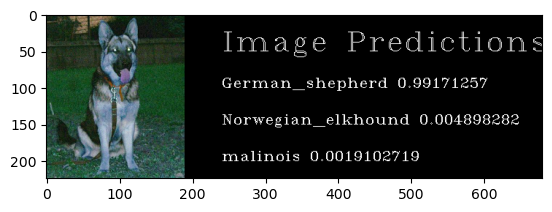

In [17]:
from tensorflow.keras.preprocessing import image
for file in imageFileName:
    img = image.load_img(imagePath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    
    imageNew = cv2.imread(imagePath+file)
    imageL = cv2.resize(imageNew, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_CUBIC)
    
    predictions = resnetModel.predict(x)
    predictions = decode_predictions(predictions, top = 3)[0]
    drawTextonImage("Image Predictions ", predictions, imageL)

# VGG16

VGG16 is a convolutional neural network (CNN) architecture. 

The VGG16 network consists of 16 layers, including 13 convolutional layers and 3 fully connected layers. It has a fixed input size of 224 x 224 x 3 and uses a set of small convolutional filters (3x3) throughout the network with a fixed stride of 1 pixel and same padding. The network also uses max-pooling layers (2x2) with a stride of 2 pixels to reduce the spatial size of the feature maps.

The architecture of VGG16 can be summarized as follows:

Input layer (224 x 224 x 3)

Convolutional layer with 64 filters, each of size 3x3, with ReLU activation

Convolutional layer with 64 filters, each of size 3x3, with ReLU activation

Max-pooling layer with a pool size of 2x2 and stride of 2 pixels

Convolutional layer with 128 filters, each of size 3x3, with ReLU activation

Convolutional layer with 128 filters, each of size 3x3, with ReLU activation

Max-pooling layer with a pool size of 2x2 and stride of 2 pixels

Convolutional layer with 256 filters, each of size 3x3, with ReLU activation

Convolutional layer with 256 filters, each of size 3x3, with ReLU activation

Convolutional layer with 256 filters, each of size 3x3, with ReLU activation

Max-pooling layer with a pool size of 2x2 and stride of 2 pixels

Convolutional layer with 512 filters, each of size 3x3, with ReLU activation

Convolutional layer with 512 filters, each of size 3x3, with ReLU activation

Convolutional layer with 512 filters, each of size 3x3, with ReLU activation

Max-pooling layer with a pool size of 2x2 and stride of 2 pixels

Convolutional layer with 512 filters, each of size 3x3, with ReLU activation

Convolutional layer with 512 filters, each of size 3x3, with ReLU activation

Convolutional layer with 512 filters, each of size 3x3, with ReLU activation

Max-pooling layer with a pool size of 2x2 and stride of 2 pixels

Fully connected layer with 4096 units and ReLU activation

Dropout layer with a rate of 0.5

Fully connected layer with 4096 units and ReLU activation

Dropout layer with a rate of 0.5

Fully connected layer with 1000 units and softmax activation (output layer)

The weights of the VGG16 network were pre-trained on the ImageNet dataset, which contains millions of labeled images. This pre-training allows the network to learn a set of general features that can be useful for a wide range of computer vision tasks. The pre-trained weights can then be fine-tuned on a smaller dataset for a specific task 

In [18]:
from tensorflow.keras.applications import vgg16, inception_v3, resnet50
vgg_model = vgg16.VGG16(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet')

96112376/96112376 [==============================] - 1s 0us/step


1/1 [==============================] - 1s 1s/step


error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/highgui/src/window.cpp:1340: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


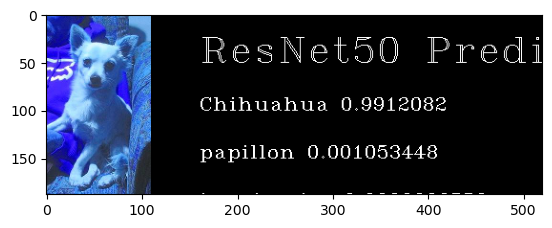

In [19]:
imagePath = "../input/cat-and-dogs/dataset/test_set/dogs/"
imageFileName = [f for f in listdir(imagePath) if isfile(join(imagePath, f))]

for file in imageFileName:

    from tensorflow.keras.preprocessing import image # Need to reload as opencv2 seems to have a conflict
    img = image.load_img(imagePath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(imagePath+file)
    imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get VGG16 Predictions
    preds_vgg_model = vgg_model.predict(x)
    preditions_vgg = decode_predictions(preds_vgg_model, top=3)[0]
    drawTextonImage("VGG16 Predictions", preditions_vgg, imageL) 

    
    # Get ResNet50 Predictions
    preds_resnet = resnet_model.predict(x)
    preditions_resnet = decode_predictions(preds_resnet, top=3)[0]
    drawTextonImage("ResNet50 Predictions", preditions_resnet, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()